In [1]:
#!pip install tabulate 

In [2]:
# Load Requires packages for analysis
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
#import time
from time import time
os.chdir("F:/Spearline/")
%matplotlib inline
import sys, os
from math import sqrt, pi, atan2, log, pow, cos, log, exp
#plt.rcParams['figure.dpi'] = 100
from tabulate import tabulate
from IPython.core.display import Image, display
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
#Load data in to python(Pandas) 
data = pd.read_csv('DataAnalytics2.csv')

In [4]:
# Check the data
data.head(5)

,ID,number,country_name,call_connect_time,call_end_time,PDD,test_counter,PESQ_score,MOS_Ie,PESQ_raw,...,DC_mean_deg,ASL_deg,RMS_deg,ASL_GAIN_refvdeg,NOISE_GAIN_refvdeg,DELAY_mean,DELAY_min,DELAY_max,DELAY_stddev,PESQ_label
0,2603510_1_2,8007231234,Germany,04-04-2017 07:11,04-04-2017 07:12,5,1,4.26,0.0,4.26,...,-1.06,-60.43,-20.51,4.97,5.66,0.03,0.03,0.03,0.00,1
1,2603906_1_2,8007231234,Germany,04-04-2017 07:26,04-04-2017 07:27,4,1,4.20,0.0,4.20,...,-1.05,-60.63,-20.50,4.97,5.73,0.01,0.01,0.01,0.00,1
2,2604028_1_2,345471234,Switzerland,04-04-2017 07:40,04-04-2017 07:40,3,1,4.31,0.0,4.15,...,1.19,-61.48,-20.83,4.65,4.62,0.03,0.03,0.03,0.00,1
3,2604023_1_2,201401234,Sweden,04-04-2017 07:41,04-04-2017 07:41,2,1,4.24,0.0,4.27,...,0.15,-65.37,-25.63,-0.16,0.66,-0.03,-0.08,0.04,0.04,1
4,2604131_1_2,805541234,France,04-04-2017 07:41,04-04-2017 07:42,25,1,4.29,0.0,4.27,...,5.74,-61.10,-20.72,4.75,5.00,0.00,0.00,0.00,0.00,1


### Lets Check data 

Let's check any variable containing missing values

In [5]:
# Check data is containing any missing value or not.
data.isnull().any()

ID                    False
number                False
country_name          False
call_connect_time     False
call_end_time         False
PDD                   False
test_counter          False
PESQ_score            False
MOS_Ie                False
PESQ_raw              False
DC_mean_ref           False
ASL_ref               False
NOISE_mean            False
RMS_ref               False
DC_mean_deg           False
ASL_deg               False
RMS_deg               False
ASL_GAIN_refvdeg      False
NOISE_GAIN_refvdeg    False
DELAY_mean            False
DELAY_min             False
DELAY_max             False
DELAY_stddev          False
PESQ_label            False
dtype: bool

# Let's do some Data exploration!

Let's understand the characteristics of different columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 24 columns):
ID                    586 non-null object
number                586 non-null int64
country_name          586 non-null object
call_connect_time     586 non-null object
call_end_time         586 non-null object
PDD                   586 non-null int64
test_counter          586 non-null int64
PESQ_score            586 non-null float64
MOS_Ie                586 non-null float64
PESQ_raw              586 non-null float64
DC_mean_ref           586 non-null float64
ASL_ref               586 non-null float64
NOISE_mean            586 non-null float64
RMS_ref               586 non-null float64
DC_mean_deg           586 non-null float64
ASL_deg               586 non-null float64
RMS_deg               586 non-null float64
ASL_GAIN_refvdeg      586 non-null float64
NOISE_GAIN_refvdeg    586 non-null float64
DELAY_mean            586 non-null float64
DELAY_min             586 non-null float64
DE

# Frqueancy of country wise Call

In [7]:
from IPython.display import display, HTML
x = data['country_name'].value_counts(dropna=True, sort=True)
df_value_counts = pd.DataFrame(x)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Country name', 'Call Counts'] # change column names
df_value_counts

,Country name,Call Counts
0,Germany,389
1,France,51
2,Sweden,51
3,Ireland,50
4,Switzerland,45


Plot data with Histogram.

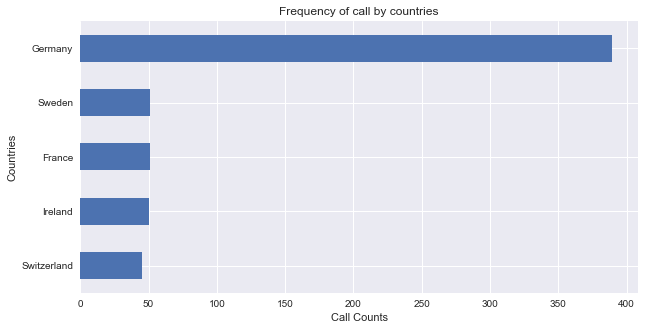

In [8]:
x.sort_values().plot(kind='barh')
# Add title and axis names
plt.title('Frequency of call by countries')
plt.xlabel('Call Counts')
plt.ylabel('Countries')


Let's understand PESQ variable and its distribution. 

In [9]:
n_PESQ = data.shape[0]

# Number of PESQ with quality rating above 6
quality_above_3_5 = data.loc[(data['PESQ_score'] > 3.5 )]
n_above_3_5 = quality_above_3_5.shape[0]

# Number of PESQ with quality rating below 5
quality_below_2_4 = data.loc[(data['PESQ_score'] < 2.4)]
n_below_2_4 = quality_below_2_4.shape[0]

# Number of PESQ with quality rating between 5 to 6
quality_between_2_4_3_4 = data.loc[(data['PESQ_score'] >= 2.4) & (data['PESQ_score'] <= 3.4)]
n_between_2_4_3_4 = quality_between_2_4_3_4.shape[0]

# Percentage of PESQ with quality rating above 6
greater_percent = n_above_3_5*100/n_PESQ

print ("***PESQ_score distributions***")
# Print the results
print("Total number of PESQ data: {}".format(n_PESQ))
print("PESQ with rating 3.5 and above: {}".format(n_above_3_5))
print("PESQ with rating less than 2.4: {}".format(n_below_2_4))
print("PESQ with rating 2.4 and 3.4: {}".format(n_between_2_4_3_4))
print("Percentage of PESQ with quality 3.5 and above: {:.2f}%".format(greater_percent))
print ("\n")
print("***Table of data descriptions***")
# Some more additional data analysis
data.describe()

***PESQ_score distributions***
Total number of PESQ data: 586
PESQ with rating 3.5 and above: 580
PESQ with rating less than 2.4: 0
PESQ with rating 2.4 and 3.4: 5
Percentage of PESQ with quality 3.5 and above: 98.98%


***Table of data descriptions***


,number,PDD,test_counter,PESQ_score,MOS_Ie,PESQ_raw,DC_mean_ref,ASL_ref,NOISE_mean,RMS_ref,DC_mean_deg,ASL_deg,RMS_deg,ASL_GAIN_refvdeg,NOISE_GAIN_refvdeg,DELAY_mean,DELAY_min,DELAY_max,DELAY_stddev,PESQ_label
count,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02,586.000000,586.000000,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,5.430853e+09,7.334471,1.008532,4.183959,0.754403,4.191894,8.000000e-02,-24.459898,-66.206177,-2.547000e+01,-0.391570,-61.445529,-21.810683,3.662253,4.191860,0.000956,-0.001860,0.004522,0.001945,1.015358
std,3.627528e+09,8.870237,0.092055,0.245268,5.129477,0.222826,1.097282e-15,0.001429,0.192203,2.489024e-13,1.188983,4.354273,2.236624,2.238887,2.204615,0.037569,0.038133,0.039047,0.007531,0.169775
min,1.533123e+07,2.000000,1.000000,2.620000,0.000000,2.620000,8.000000e-02,-24.480000,-66.520000,-2.547000e+01,-1.070000,-66.580000,-25.880000,-0.420000,-0.220000,-0.150000,-0.190000,-0.110000,0.000000,1.000000
25%,8.055412e+08,4.000000,1.000000,4.240000,0.000000,4.260000,8.000000e-02,-24.460000,-66.400000,-2.547000e+01,-1.060000,-61.480000,-20.830000,4.650000,4.620000,-0.010000,-0.010000,0.000000,0.000000,1.000000
50%,8.007231e+09,4.000000,1.000000,4.270000,0.000000,4.270000,8.000000e-02,-24.460000,-66.100000,-2.547000e+01,-1.050000,-60.830000,-20.510000,4.970000,5.280000,0.010000,0.010000,0.010000,0.000000,1.000000
75%,8.007231e+09,5.000000,1.000000,4.280000,0.000000,4.280000,8.000000e-02,-24.460000,-66.090000,-2.547000e+01,0.160000,-60.760000,-20.500000,4.970000,5.650000,0.020000,0.020000,0.030000,0.000000,1.000000
max,8.007231e+09,43.000000,2.000000,4.380000,54.650000,4.380000,8.000000e-02,-24.450000,-65.910000,-2.547000e+01,6.450000,-31.430000,-20.460000,5.020000,8.870000,0.100000,0.050000,0.170000,0.080000,3.000000


In [10]:
# Percentage of column containing 0 valuep
print("column name\t\tMissing values (%)")
data.isin([0]).sum()/586 * 100


column name		Missing values (%)


ID                     0.000000
number                 0.000000
country_name           0.000000
call_connect_time      0.000000
call_end_time          0.000000
PDD                    0.000000
test_counter           0.000000
PESQ_score             0.000000
MOS_Ie                96.416382
PESQ_raw               0.000000
DC_mean_ref            0.000000
ASL_ref                0.000000
NOISE_mean             0.000000
RMS_ref                0.000000
DC_mean_deg            0.000000
ASL_deg                0.000000
RMS_deg                0.000000
ASL_GAIN_refvdeg       0.000000
NOISE_GAIN_refvdeg     0.000000
DELAY_mean            11.604096
DELAY_min             12.116041
DELAY_max             10.580205
DELAY_stddev          89.931741
PESQ_label             0.000000
dtype: float64

### Let create correlation matrix (Heat map)

Heat map uses to understand the linear relationship between two or more variables.

In [11]:
# Remove VAR that is not useful 
data1 = data.drop(['DELAY_stddev','MOS_Ie','ID', 'number', 'country_name', 'call_connect_time','call_end_time', 'test_counter','DELAY_stddev','PESQ_score'], axis = 1)
data1.head(2)

,PDD,PESQ_raw,DC_mean_ref,ASL_ref,NOISE_mean,RMS_ref,DC_mean_deg,ASL_deg,RMS_deg,ASL_GAIN_refvdeg,NOISE_GAIN_refvdeg,DELAY_mean,DELAY_min,DELAY_max,PESQ_label
0,5,4.26,0.08,-24.46,-66.09,-25.47,-1.06,-60.43,-20.51,4.97,5.66,0.03,0.03,0.03,1
1,4,4.20,0.08,-24.46,-66.36,-25.47,-1.05,-60.63,-20.50,4.97,5.73,0.01,0.01,0.01,1


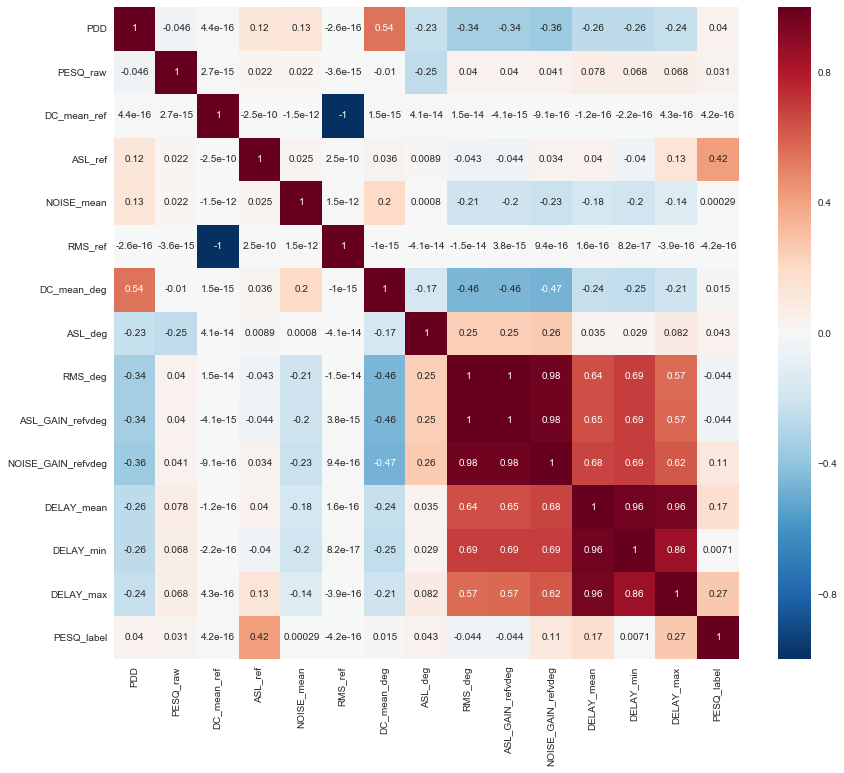

In [12]:
# Lets create heat map
correlation = data1.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

The squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are — they’ll be more reddish. That means, if one feature increases, the other one also tends to increase, and vice-versa.

The squares that have negative values show an inverse co-relationship. The more negative these values get, the more inversely proportional they are, and they’ll be more blue. This means that if the value of one feature is higher, the value of the other one gets lower.

Finally, squares close to zero indicate almost no co-dependency between those sets of features. from this matrix we can see  positive co-relationships of following variables
***NOISE_GAIN_*** and ***refvdeg	RMS_deg***	            *(98)*,
***NOISE_GAIN_*** and ***refvdeg	ASL_GAIN_refvdeg***	*(98)*
***DELAY_mean*** and	***ASL_GAIN_refvdeg***	        *(64)*
***DELAY_mean*** and	***RMS_deg***	                    *(65)*
***DELAY_mean*** and	***NOISE_GAIN_refvdeg***	        *(68)*
***DELAY_min*** and	***ASL_GAIN_refvdeg***	        *(69)*
***DELAY_min*** and	***RMS_deg	***                    *(69)*
***DELAY_min*** and	***NOISE_GAIN_refvdeg***	        *(69)*.



# Calculate R factor

***R-factor*** : R-factor is a number, or score, that is used to quantitatively express the subjective quality of speech in communications systems, especially digital networks that carry voice over IP (VoIP) traffic, or for which VoIP service is under consideration. The R-factor score, which is used in conjunction with voice testing processes, can range from 1 (worst) to 100 (best), and is based on the percentage of users who are satisfied with the quality of a test voice signal after it has passed through a network from a source (transmitter) to a destination (receiver).R-factor is a number, or score, that is used to quantitatively express the subjective quality of speech in communications systems, especially digital networks that carry voice over IP (VoIP) traffic, or for which VoIP service is under consideration. The R-factor score, which is used in conjunction with voice testing processes, can range from 1 (worst) to 100 (best), and is based on the percentage of users who are satisfied with the quality of a test voice signal after it has passed through a network from a source (transmitter) to a destination (receiver).

First, we calculate PESQ to MOS value. The equation for calculating PESQ to MOS is:

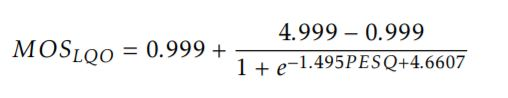

In [13]:
display(Image("F:\Spearline\img1.jpg"))

In [14]:
# Funcation for calculate PESQ to MOS value
def pesq2mos(pesq):
    """ Return MOS LQO value (within 1..4.5) on PESQ value (within -0.5..4.5).
    Mapping function given from P.862.1 (11/2003) """
    return 0.999 + (4.999-0.999) / (1+exp(-1.4945*pesq+4.6607))

Now, we calculate MOS to R-factor. The equation for calculating r factor 

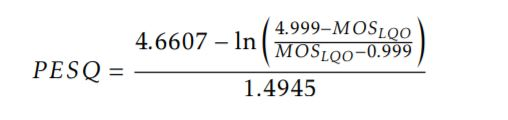

In [15]:
display(Image("F:\Spearline\img2.jpg"))

In [16]:
# MOS to R factor
def mos2r(mos):
    """ With given MOS LQO return R-factor  (1 < MOS < 4.5) """
    D = -903522 + 1113960 * mos - 202500 * mos * mos
    if D < 0:
        D = 0
    h = 1/3 * atan2(15*sqrt(D), 18556-6750*mos)
    R = 20/3 * (8 - sqrt(226) * cos(h+pi/3))
    return R > 100 and 100.0 or R

In [17]:
# Loop over pesq2mos funcation and store value in MOS_LQO column
data["MOS_LQO"] = ""
for i in range(0,len(data)):
    data["MOS_LQO"][i] = (pesq2mos(data["PESQ_score"][i]))

In [18]:
# Loop over mos2r funcation and store value in R_factor column
data["R_factor"] = ""
for i in range(0,len(data)):
              data['R_factor'][i] = (mos2r(data["MOS_LQO"][i]))

Now, Using the R factor let's convert a value in labels. Bifurcation is given below. 

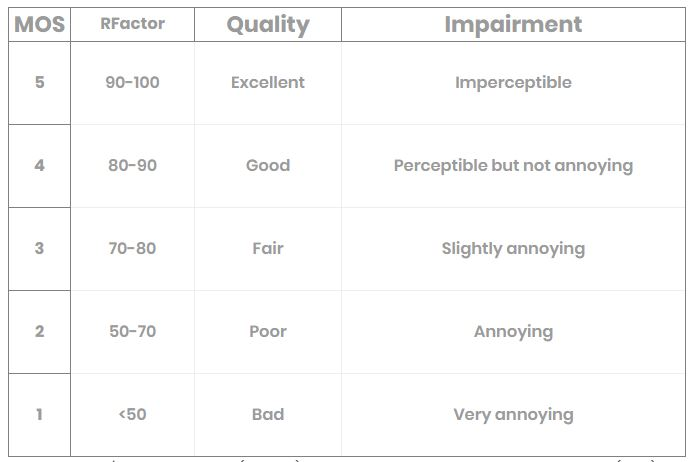

In [19]:
display(Image("F:\Spearline\img3.jpg"))

In [20]:
# Create a dictionary and range for labels.
bins = [40, 50, 70, 80, 90, 100]
labels = ['Bad', 'Poor', 'Fair', 'Good', 'Excellent']

In [21]:
# Assign labels to the range that we just created and store it to the "bins" variable.
data['bins'] = pd.cut(data['R_factor'], bins=bins, labels=labels, include_lowest=True)
data.head(2)

,ID,number,country_name,call_connect_time,call_end_time,PDD,test_counter,PESQ_score,MOS_Ie,PESQ_raw,...,ASL_GAIN_refvdeg,NOISE_GAIN_refvdeg,DELAY_mean,DELAY_min,DELAY_max,DELAY_stddev,PESQ_label,MOS_LQO,R_factor,bins
0,2603510_1_2,8007231234,Germany,04-04-2017 07:11,04-04-2017 07:12,5,1,4.26,0.0,4.26,...,4.97,5.66,0.03,0.03,0.03,0.0,1,4.3842,91.9786,Excellent
1,2603906_1_2,8007231234,Germany,04-04-2017 07:26,04-04-2017 07:27,4,1,4.20,0.0,4.20,...,4.97,5.73,0.01,0.01,0.01,0.0,1,4.33608,89.8927,Good


Create a bar chart for R Factor labels that we just assign.

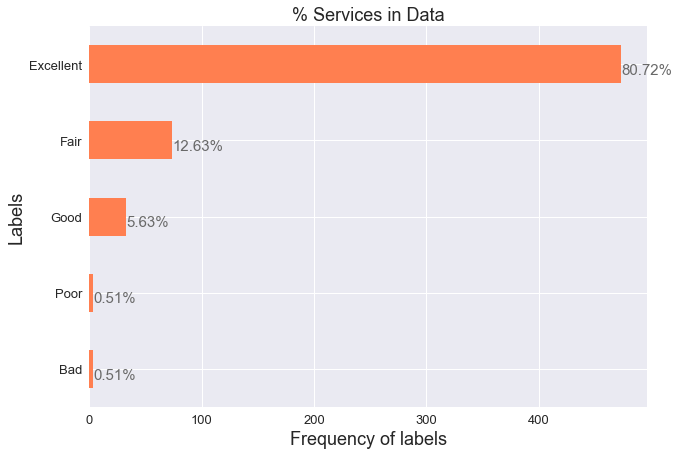

In [22]:
ax = data['bins'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);

ax.set_alpha(0.8)
ax.set_title("% Services in Data", fontsize=18)
ax.set_xlabel("Frequency of labels", fontsize=18);
ax.set_ylabel("Labels", fontsize=18);
#ax.set_xticks([0, 40, 50, 70, 80, 90, 100])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

From the above chart, we can see most of the r factor is in a range of "Excellent." (80.7%) Followed by "fair" (12.62%) and the rest of the other categories. Let's understand it country-wise distributions.

In [23]:
# Create a data frame for every country.
ger = (data.loc[data['country_name'] == 'Germany'])
ger1 = ger
fra = (data.loc[data['country_name'] == 'France'])
fra1 = fra
swe = (data.loc[data['country_name'] == 'Sweden'])
swe1 = swe
ire = (data.loc[data['country_name'] == 'Ireland'])
ire1 = ire
swi = (data.loc[data['country_name'] == 'Switzerland'])
swi1 = swi

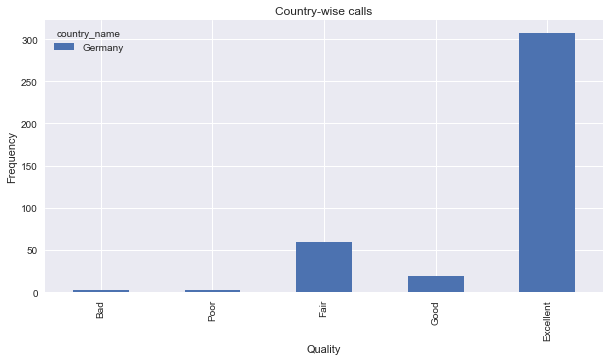

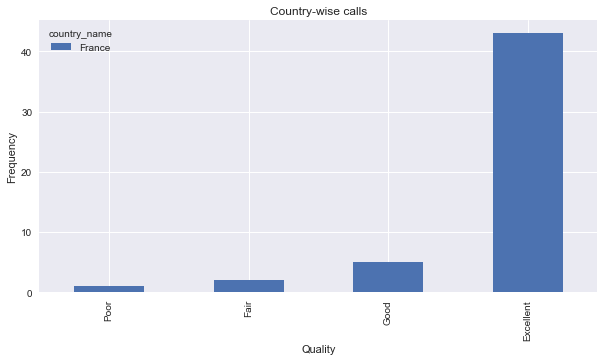

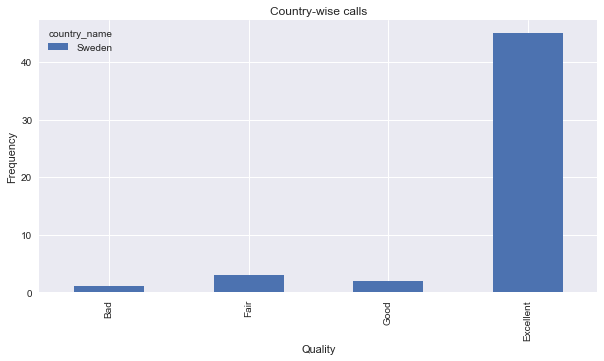

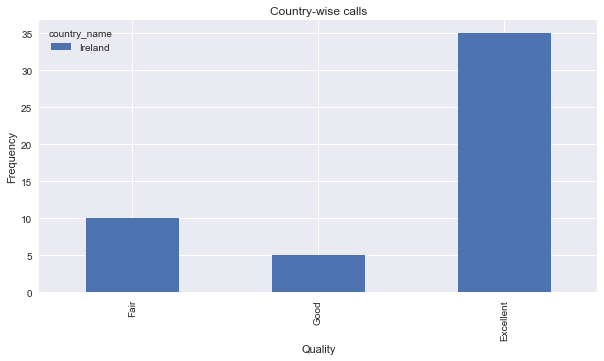

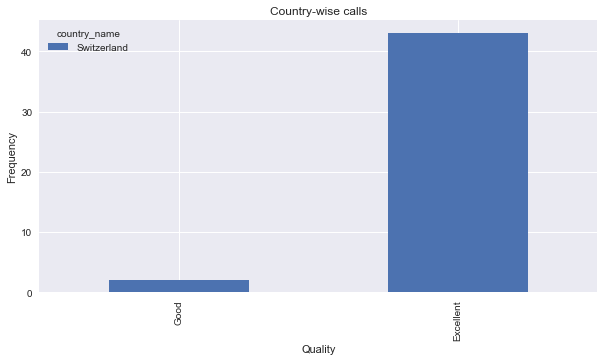

In [24]:
# Create a bar chart for every country.
ger = ger.groupby(['country_name','bins'])['bins'].count().unstack(0).plot.bar(title="Country-wise calls", figsize=(10,5))
ger.set_xlabel('Quality')
ger.set_ylabel('Frequency')
fra = fra.groupby(['country_name','bins'])['bins'].count().unstack(0).plot.bar(title="Country-wise calls", figsize=(10,5))
fra.set_xlabel('Quality')
fra.set_ylabel('Frequency')
swe = swe.groupby(['country_name','bins'])['bins'].count().unstack(0).plot.bar(title="Country-wise calls", figsize=(10,5))
swe.set_xlabel('Quality')
swe.set_ylabel('Frequency')
ire = ire.groupby(['country_name','bins'])['bins'].count().unstack(0).plot.bar(title="Country-wise calls", figsize=(10,5))
ire.set_xlabel('Quality')
ire.set_ylabel('Frequency')
swi = swi.groupby(['country_name','bins'])['bins'].count().unstack(0).plot.bar(title="Country-wise calls", figsize=(10,5))
swi.set_xlabel('Quality')
swi.set_ylabel('Frequency')

In [25]:
# Print results in percentages
print ("Germany")
print (ger1['bins'].value_counts(normalize=True))
print ("\n")
print ("France")
print (fra1['bins'].value_counts(normalize=True))
print ("\n")
print ("Sweden")
print(swe1['bins'].value_counts(normalize=True))
print ("\n")
print ("Ireland")
print(ire1['bins'].value_counts(normalize=True))
print ("\n")
print ("Switzerland")
print(swi1['bins'].value_counts(normalize=True))

Germany
Excellent    0.789203
Fair         0.151671
Good         0.048843
Poor         0.005141
Bad          0.005141
Name: bins, dtype: float64


France
Excellent    0.843137
Good         0.098039
Fair         0.039216
Poor         0.019608
Bad          0.000000
Name: bins, dtype: float64


Sweden
Excellent    0.882353
Fair         0.058824
Good         0.039216
Bad          0.019608
Poor         0.000000
Name: bins, dtype: float64


Ireland
Excellent    0.7
Fair         0.2
Good         0.1
Poor         0.0
Bad          0.0
Name: bins, dtype: float64


Switzerland
Excellent    0.955556
Good         0.044444
Fair         0.000000
Poor         0.000000
Bad          0.000000
Name: bins, dtype: float64


From the above bar chars and tables, we can understand that all countries are in either "Excellent" and "Good."

## Lets Creat model for predicting PESQ score

Frist, We’ll create training and testing subsets for the data:

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [27]:
data1.head(5)

,PDD,PESQ_raw,DC_mean_ref,ASL_ref,NOISE_mean,RMS_ref,DC_mean_deg,ASL_deg,RMS_deg,ASL_GAIN_refvdeg,NOISE_GAIN_refvdeg,DELAY_mean,DELAY_min,DELAY_max,PESQ_label
0,5,4.26,0.08,-24.46,-66.09,-25.47,-1.06,-60.43,-20.51,4.97,5.66,0.03,0.03,0.03,1
1,4,4.20,0.08,-24.46,-66.36,-25.47,-1.05,-60.63,-20.50,4.97,5.73,0.01,0.01,0.01,1
2,3,4.15,0.08,-24.46,-66.10,-25.47,1.19,-61.48,-20.83,4.65,4.62,0.03,0.03,0.03,1
3,2,4.27,0.08,-24.46,-66.03,-25.47,0.15,-65.37,-25.63,-0.16,0.66,-0.03,-0.08,0.04,1
4,25,4.27,0.08,-24.46,-66.10,-25.47,5.74,-61.10,-20.72,4.75,5.00,0.00,0.00,0.00,1


In [28]:
quality_raw = data1['PESQ_label']
features_raw = data1.drop(['PESQ_raw', 'PESQ_label'], axis = 1)

In the below code cell, we use the sklearn train_test_split method and give it our features data (X)and the target labels (y). It shuffles and dives our dataset into two parts — 80% of it is used for training and the remaining 20% is used for testing purposes.

In [29]:
# Split the 'features' and 'PESQ_label' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw,
 quality_raw,
 test_size = 0.2,
 random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 468 samples.
Testing set has 118 samples.


Next, we’ll run our training on an algorithm and evaluate its performance.
we’ll need a function that’ll accept an ML algorithm of our choice, and the training and testing datasets. The function will run the training, and then will evaluate the performance of the algorithm using some performance metrics.


Finally, we’ll write a function where you’ll initialize any 3 algorithms of our choice (Gaussian Naive Bayes, DecisionTreeClassifier, Random Forest Classifier), and run the training on each of them using the above function. we’ll then aggregate all the results, and then visualize them.

In [30]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)

In [32]:
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100
# samples_1 is 1% of samples_100

samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

In [33]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with 'sample_size' 
    using .fit(training_features[:], training_labels[:])
    """
    start = time() # Get start time of training
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
    end = time() # Get end time of training
    
    # Calculate the training time
    results['train_time'] = end - start
    
    """
    Get the predictions on the first 300 training samples(X_train), 
    and also predictions on the test set(X_test) using .predict()
    """
    start = time() # Get start time
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [34]:
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 4 samples.
GaussianNB trained on 46 samples.
GaussianNB trained on 468 samples.
DecisionTreeClassifier trained on 4 samples.
DecisionTreeClassifier trained on 46 samples.
DecisionTreeClassifier trained on 468 samples.
RandomForestClassifier trained on 4 samples.
RandomForestClassifier trained on 46 samples.
RandomForestClassifier trained on 468 samples.


The classification algorithms that scikit-learn provides, come with a feature importance attribute. Using this attribute, you can see the importance of each feature by its relative ranks when making predictions, based on the chosen algorithm.

In [35]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_
importances = model.feature_importances_

b = (X_train.columns).tolist() 
a = list(importances)

In [36]:
y = np.arange(len(b))

<Container object of 13 artists>

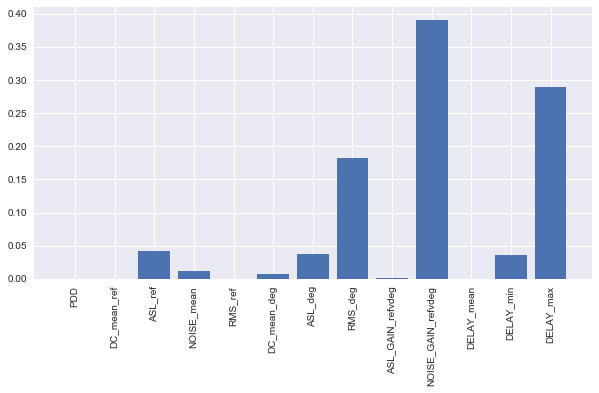

In [37]:
# Visualise importance of each variable in the model
plt.xticks(rotation='vertical')
plt.xticks(y,b)
plt.bar(y,a)

As we can see DC_mean_ref, RMS_ref and PDD are not significant for model building. On the other hand MOS_Ie, DELAY_mean and NOISE_GAIN_refvdeg are significant for model building. for this, we will use all the variables in model building process.

In [38]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


Out model achieved very high accuracy with a very good F score. Let's make predictions using this model.

In [39]:
PESQ_data = [[5, 0.08, -24.46, -66.03, -25.47, -1.02, -58.63, -20.51, 4.97, 7.4, 0.03, -0.01, 0.07], #2 
[5, 0.08, -24.46, -66.09, -25.47, -1.06, -60.43, -20.51, 4.97, 5.66, 0.03, 0.03, 0.03],#1
[10, 0.08, -24.46, -66.46, -25.47, -0.95, -60.44, -20.68, 4.79, 6.02, 0.1, 0.02, 0.16]]#3
               
# Show predictions
for i, quality in enumerate(best_clf.predict(PESQ_data)):
    print("Predicted quality for PESQ {} is: {}".format(i+1, quality))
    
#Expected results:  2,1,3

Predicted quality for PESQ 1 is: 1
Predicted quality for PESQ 2 is: 1
Predicted quality for PESQ 3 is: 3


Great! Our model predicted each class perfectly. 